# Tarea 1.

**Requisitos:**  

- Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.
- Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis, etc.
- Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico hecho en Latex.
- Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF (y TEX si aplica) en una carpeta claramente identificada.



## Estructura del código.

### Origen de datos.

1. "The Marvelous Land of Oz" de L. Frank Baum. (https://www.gutenberg.org/ebooks/54)
2. "Dorothy and the Wizard in Oz" de L. Frank Baum. (https://www.gutenberg.org/ebooks/22566)
3. "The Magic of Oz" de L. Frank Baum. (https://www.gutenberg.org/ebooks/419)

Estos libros están disponibles en el Proyecto Gutenberg.


### Procesamiento de datos.

- **Limpieza del texto:** Eliminar caracteres especiales, números y signos de puntuación innecesarios.
- **Tokenización:** Separar el texto en palabras individuales.
- **Conversión a minúsculas:** Convertir todas las palabras a minúsculas para evitar duplicados debido a diferencias de mayúsculas y minúsculas.
- **Eliminación de stopwords:** Remover palabras comunes que no aportan significado significativo al análisis, por ejemplo: "the", "and", "is".


### Análisis estadístico.
- Estadística descriptiva básica
- Frecuencias
- Distribuciones de palabras
- n-Gramas
- Uso de signos de puntuación




In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import os
from nltk import word_tokenize, sent_tokenize, ngrams
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud


In [4]:
# Descargar recursos necesarios de NLTK

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicevillalpando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicevillalpando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Rutas de archivos locales

file_paths = {
    "The Marvelous Land of Oz": "The Marvelous Land of Oz.txt",
    "Dorothy and the Wizard in Oz": "Dorothy and the Wizard in Oz.txt",
    "The Magic of Oz": "The Magic of Oz.txt"
}

## Funciones.

In [7]:
# Configuración de stopwords en inglés

STOP_WORDS = set(stopwords.words('english'))


In [8]:
# Función para cargar y limpiar texto desde un archivo

def load_and_clean_text(file_path):
    try:
        # Leer el archivo con codificación UTF-8
        with open(file_path, 'r', encoding = 'utf-8') as file:
            raw_text = file.read()
    except FileNotFoundError:
        print(f"Archivo no encontrado: {file_path}")
        return None
    
    # Eliminar encabezados y pies de Project Gutenberg 
    start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK"
    end_marker = "*** END OF THIS PROJECT GUTENBERG EBOOK"
    start_idx = raw_text.find(start_marker)
    end_idx = raw_text.find(end_marker)
    if start_idx != -1:
        raw_text = raw_text[start_idx + len(start_marker):]
    if end_idx != -1:
        raw_text = raw_text[:end_idx]

    # Limpiar el texto: eliminar saltos de línea, caracteres especiales y convertir a minúsculas
    clean_text = re.sub(r'\n', ' ', raw_text)   # reemplazar salgos de linea por espacios
    clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text).lower()
    
    return clean_text
    

In [9]:
# Función para tokenizar el texto y eliminar stopwords

def tokenize_and_filter(text):
    tokens = word_tokenize(text)  # Tokenizar el texto
    
    return [word for word in tokens if word not in STOP_WORDS and len(word) > 1]  


In [10]:
# Función para calcular estadísticas descriptivas básicas del texto

def calculate_stats(tokens, text):
    sentences = sent_tokenize(text)  # Dividir el texto en oraciones
    stats = {
        'total_words': len(tokens),  # Total de palabras
        'unique_words': len(set(tokens)),  # Palabras únicas
        'avg_word_length': sum(len(word) for word in tokens) / len(tokens),  
        'total_sentences': len(sentences),  # Total de oraciones
        'punctuation_count': sum(1 for char in text if char in '.,!?;:()[]{}\'"')  
    }
    
    return stats
    

In [11]:
# Función para calcular los n-gramas más frecuentes

def get_top_ngrams(tokens, n, top_n = 20):
    return Counter(ngrams(tokens, n)).most_common(top_n)  # Calcular n-gramas y obtener los más frecuentes


In [12]:
# Función para crear y mostrar una nube de palabras

def plot_wordcloud(word_counts, title, top_n = None):
    
    # Si se especifica top_n, seleccionar solo las palabras más frecuentes
    if top_n:
        top_words = dict(word_counts.most_common(top_n))
    else:
        top_words = dict(word_counts)  # Usar todas las palabras

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='black', 
                          colormap='cool').generate_from_frequencies(top_words)
    
    # Visualización
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Quitar los ejes
    plt.title(title, fontsize=16, color='white')  
    plt.show()


In [13]:
# Función para graficar las frecuencias de palabras

def plot_word_frequencies(word_counts, title, top_n = 10):
    top_words = word_counts.most_common(top_n)  # Obtener las palabras más frecuentes
    words, counts = zip(*top_words)  # Separar palabras y frecuencias

    plt.figure(figsize = (10, 6))
    bars = plt.bar(words, counts, color = 'purple')  # Crear el gráfico de barras

    # Mostrar valores sobre cada barra
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha = 'center', fontsize = 12)

    plt.title(f"\n Top {top_n} Palabras Más Frecuentes: {title}")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation = 90)  
    plt.show()
    

In [14]:
# Función para graficar los n-gramas

def plot_ngrams(ngrams_counts, title, top_n = 10):
    ngrams_list = [' '.join(gram) for gram, _ in ngrams_counts]  # Unir los n-gramas en cadenas de texto
    counts = [count for _, count in ngrams_counts[:top_n]]  # Obtener las frecuencias

    plt.figure(figsize = (10, 6))
    bars = plt.bar(ngrams_list[:top_n], counts, color = 'orchid')  

    # Mostrar valores sobre cada barra
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha = 'center', fontsize=12)

    plt.title(f"\n Top {top_n} {title}")
    plt.xlabel("N-gramas")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation = 90)
    plt.show()
    

In [15]:
# Función para generar un grafo de palabras o bigramas

def generate_graph(tokens, title, top_n = 10):

    # Calcular los bigramas y sus frecuencias
    bigrams = get_top_ngrams(tokens, 2, top_n)
    
    # Crear un grafo dirigido
    G = nx.DiGraph()

    # Agregar nodos y aristas con pesos al grafo
    for (word1, word2), weight in bigrams:
        G.add_edge(word1, word2, weight = weight)

    # Posicionamiento de los nodos
    pos = nx.spring_layout(G, k = 1)

    # Dibujar el grafo
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_color = 'lightpink', node_size = 1500)
    nx.draw_networkx_edges(G, pos, arrowstyle = '->', arrowsize = 20, edge_color = 'gray')
    nx.draw_networkx_labels(G, pos, font_size = 8, font_color = 'black')

    # Dibujar etiquetas con los pesos en las aristas
    edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data = True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color = 'red')

    plt.title(f"Grafo de Bigramas: {title}")
    plt.axis('off')  # Quitar los ejes
    plt.show()
    

In [16]:
# Función para graficar comparaciones generales

def plot_comparison(data, title, ylabel):
    df = pd.DataFrame(data)
    df.plot(kind='bar', figsize = (10, 6), color = ['hotpink', 'deepskyblue', 'mediumorchid']) 
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Libros")
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()


In [17]:
# Función principal para procesar los libros

def process_books(file_paths):
    results = {}
    for title, path in file_paths.items():
        print(f"=== Procesando: {title} ===")
        clean_text = load_and_clean_text(path)  # Cargar y limpiar texto
        if not clean_text:
            continue

        # Procesamiento de texto
        tokens = tokenize_and_filter(clean_text)      # Tokenizar y filtrar palabras
        stats = calculate_stats(tokens, clean_text)   # Calcular estadísticas
        word_counts = Counter(tokens)                 # Contar palabras
        bigrams = get_top_ngrams(tokens, 2)           # Obtener bigramas
        trigrams = get_top_ngrams(tokens, 3)          # Obtener trigramas

        # Almacenar resultados
        results[title] = {
            'tokens': tokens,
            'stats': stats,
            'word_counts': word_counts,
            'bigrams': bigrams,
            'trigrams': trigrams
        }

        # Visualización de resultados
        plot_wordcloud(word_counts, f"\n Nube de Palabras: {title}")
        plot_word_frequencies(word_counts, title)
        plot_ngrams(bigrams, f"\n Bigrams en {title}")
        generate_graph(tokens, title)  # Generar y mostrar el grafo
        plot_ngrams(trigrams, f"\n Trigrams en {title}")

        print(f"\nEstadísticas: {stats} \n\n\n\n")

    return results
    

In [18]:
# Función para comparar resultados entre libros

def compare_books(results):
    # Comparar estadísticas descriptivas
    stats_data = {title: res['stats'] for title, res in results.items()}
    stats_df = pd.DataFrame(stats_data).T
    plot_comparison(stats_df[['total_words', 'unique_words']], 
                    "Comparación de Palabras Totales y Únicas", "Cantidad")
    
    plot_comparison(stats_df[['avg_word_length', 'total_sentences']], 
                    "Comparación de Longitud Promedio de Palabras y Oraciones", "Valor Promedio")

    # Comparar palabras únicas y comunes
    all_tokens = {title: set(res['tokens']) for title, res in results.items()}
    shared_words = set.intersection(*all_tokens.values())                                  # Palabras comunes
    unique_words = {title: tokens - shared_words for title, tokens in all_tokens.items()}  # Palabras únicas
    
    print("\n === Comparación de Palabras Únicas === \n")
    for title, words in unique_words.items():
        print(f"{title}: {list(words)[:10]} (primeras 10 palabras únicas) \n")

    print(f"\n Palabras comunes entre los libros: {list(shared_words)[:10]} (primeras 10) \n")


#### Libro 1. The Marvelous Land of Oz": "The Marvelous Land of Oz

In [20]:
# "The Marvelous Land of Oz": "The Marvelous Land of Oz.txt"

In [21]:
libro1_limpio = load_and_clean_text("The Marvelous Land of Oz.txt")

libro1_limpio

' the marvelous land of oz      the marvelous land of oz  by l frank baum     authors note   after the publication of the wonderful wizard of oz i began to receive letters from children telling me of their pleasure in reading the story and asking me to write something more about the scarecrow and the tin woodman at first i considered these little letters frank and earnest though they were in the light of pretty compliments but the letters continued to come during succeeding months and even years  finally i promised one little girl who made a long journey to see me and prefer her requestand she is a dorothy by the waythat when a thousand little girls had written me a thousand little letters asking for the scarecrow and the tin woodman i would write the book either little dorothy was a fairy in disguise and waved her magic wand or the success of the stage production of the wizard of oz made new friends for the story for the thousand letters reached their destination long sinceand many mo

In [22]:
tokens1 = tokenize_and_filter(libro1_limpio)

tokens1

['marvelous',
 'land',
 'oz',
 'marvelous',
 'land',
 'oz',
 'frank',
 'baum',
 'authors',
 'note',
 'publication',
 'wonderful',
 'wizard',
 'oz',
 'began',
 'receive',
 'letters',
 'children',
 'telling',
 'pleasure',
 'reading',
 'story',
 'asking',
 'write',
 'something',
 'scarecrow',
 'tin',
 'woodman',
 'first',
 'considered',
 'little',
 'letters',
 'frank',
 'earnest',
 'though',
 'light',
 'pretty',
 'compliments',
 'letters',
 'continued',
 'come',
 'succeeding',
 'months',
 'even',
 'years',
 'finally',
 'promised',
 'one',
 'little',
 'girl',
 'made',
 'long',
 'journey',
 'see',
 'prefer',
 'requestand',
 'dorothy',
 'waythat',
 'thousand',
 'little',
 'girls',
 'written',
 'thousand',
 'little',
 'letters',
 'asking',
 'scarecrow',
 'tin',
 'woodman',
 'would',
 'write',
 'book',
 'either',
 'little',
 'dorothy',
 'fairy',
 'disguise',
 'waved',
 'magic',
 'wand',
 'success',
 'stage',
 'production',
 'wizard',
 'oz',
 'made',
 'new',
 'friends',
 'story',
 'thousand',
 

In [23]:
calculate_stats(tokens1, libro1_limpio)

{'total_words': 22499,
 'unique_words': 4738,
 'avg_word_length': 5.973376594515312,
 'total_sentences': 1,
 'punctuation_count': 0}

In [24]:
word_counts_1 = Counter(tokens1).most_common(20)
word_counts_1

[('said', 321),
 ('tip', 284),
 ('scarecrow', 277),
 ('upon', 165),
 ('jack', 154),
 ('woodman', 139),
 ('tin', 137),
 ('one', 133),
 ('sawhorse', 128),
 ('illustration', 128),
 ('image', 128),
 ('pumpkinhead', 115),
 ('city', 111),
 ('mombi', 110),
 ('boy', 107),
 ('us', 105),
 ('wogglebug', 104),
 ('head', 98),
 ('must', 94),
 ('old', 89)]

In [25]:
bigrams_1 = get_top_ngrams(tokens1, 2, top_n = 20)  # Generar bigramas
bigrams_1


[(('illustration', 'image'), 128),
 (('tin', 'woodman'), 127),
 (('project', 'gutenberg'), 84),
 (('emerald', 'city'), 76),
 (('said', 'tip'), 44),
 (('said', 'scarecrow'), 41),
 (('image', 'illustration'), 39),
 (('old', 'mombi'), 37),
 (('let', 'us'), 29),
 (('jack', 'pumpkinhead'), 25),
 (('said', 'jack'), 25),
 (('said', 'tin'), 24),
 (('land', 'oz'), 21),
 (('army', 'revolt'), 18),
 (('gutenberg', 'electronic'), 18),
 (('asked', 'jack'), 17),
 (('electronic', 'works'), 16),
 (('highly', 'magnified'), 15),
 (('old', 'woman'), 14),
 (('nick', 'chopper'), 14)]

In [26]:
trigrams_1 = get_top_ngrams(tokens1, 3, top_n = 20)  # Generar trigramas
trigrams_1


[(('illustration', 'image', 'illustration'), 39),
 (('image', 'illustration', 'image'), 39),
 (('said', 'tin', 'woodman'), 23),
 (('project', 'gutenberg', 'electronic'), 18),
 (('project', 'gutenberg', 'literary'), 13),
 (('gutenberg', 'literary', 'archive'), 13),
 (('literary', 'archive', 'foundation'), 13),
 (('gutenberg', 'electronic', 'works'), 12),
 (('soldier', 'green', 'whiskers'), 11),
 (('scarecrow', 'tin', 'woodman'), 10),
 (('project', 'gutenberg', 'license'), 10),
 (('friend', 'tin', 'woodman'), 7),
 (('full', 'project', 'gutenberg'), 7),
 (('count', 'seventeen', 'twos'), 6),
 (('gutenberg', 'electronic', 'work'), 6),
 (('illustration', 'image', 'tip'), 5),
 (('answered', 'tin', 'woodman'), 5),
 (('exclaimed', 'tin', 'woodman'), 5),
 (('project', 'gutenberg', 'trademark'), 5),
 (('project', 'gutenberg', 'works'), 5)]

### Libro 2. Dorothy and the Wizard in Oz": "Dorothy and the Wizard in Oz

In [28]:
# "Dorothy and the Wizard in Oz.txt"

In [29]:
libro2_limpio = load_and_clean_text("Dorothy and the Wizard in Oz.txt")

In [30]:
tokens2 = tokenize_and_filter(libro2_limpio)

In [31]:
calculate_stats(tokens2, libro2_limpio)

{'total_words': 22031,
 'unique_words': 4524,
 'avg_word_length': 5.709908764922155,
 'total_sentences': 1,
 'punctuation_count': 0}

In [32]:
word_counts_2 = Counter(tokens2).most_common(20)
word_counts_2

[('said', 277),
 ('wizard', 264),
 ('dorothy', 244),
 ('one', 184),
 ('jim', 155),
 ('little', 146),
 ('zeb', 136),
 ('upon', 115),
 ('could', 105),
 ('asked', 105),
 ('eureka', 103),
 ('see', 102),
 ('people', 98),
 ('kitten', 96),
 ('horse', 96),
 ('time', 94),
 ('would', 91),
 ('us', 89),
 ('girl', 86),
 ('project', 86)]

In [33]:
bigrams_2 = get_top_ngrams(tokens2, 2, top_n = 20)  # Generar bigramas
bigrams_2

[(('project', 'gutenberg'), 84),
 (('little', 'man'), 36),
 (('said', 'dorothy'), 35),
 (('said', 'wizard'), 29),
 (('little', 'girl'), 23),
 (('im', 'sure'), 22),
 (('land', 'oz'), 21),
 (('asked', 'dorothy'), 20),
 (('said', 'zeb'), 19),
 (('tiny', 'piglets'), 18),
 (('tin', 'woodman'), 18),
 (('gutenberg', 'electronic'), 18),
 (('electronic', 'works'), 16),
 (('princess', 'ozma'), 15),
 (('nine', 'tiny'), 15),
 (('united', 'states'), 15),
 (('illustration', 'chapter'), 15),
 (('emerald', 'city'), 15),
 (('could', 'see'), 14),
 (('said', 'little'), 14)]

In [34]:
trigrams_2 = get_top_ngrams(tokens2, 3, top_n = 20)  # Generar trigramas
trigrams_2

[(('project', 'gutenberg', 'electronic'), 18),
 (('nine', 'tiny', 'piglets'), 13),
 (('project', 'gutenberg', 'literary'), 13),
 (('gutenberg', 'literary', 'archive'), 13),
 (('literary', 'archive', 'foundation'), 13),
 (('gutenberg', 'electronic', 'works'), 12),
 (('said', 'little', 'man'), 10),
 (('project', 'gutenberg', 'license'), 10),
 (('full', 'project', 'gutenberg'), 7),
 (('gutenberg', 'electronic', 'work'), 6),
 (('project', 'gutenberg', 'trademark'), 5),
 (('project', 'gutenberg', 'works'), 5),
 (('project', 'gutenberg', 'work'), 5),
 (('dorothy', 'wizard', 'oz'), 4),
 (('little', 'man', 'looked'), 4),
 (('protected', 'us', 'copyright'), 4),
 (('us', 'copyright', 'law'), 4),
 (('distributing', 'project', 'gutenberg'), 4),
 (('phrase', 'project', 'gutenberg'), 4),
 (('copies', 'project', 'gutenberg'), 4)]

### Libro 3. The Magic of Oz": "The Magic of Oz

In [36]:
# "The Magic of Oz.txt"

In [37]:
libro3_limpio = load_and_clean_text("The Magic of Oz.txt")

In [38]:
tokens3 = tokenize_and_filter(libro3_limpio)

In [39]:
calculate_stats(tokens3, libro3_limpio)

{'total_words': 21003,
 'unique_words': 3925,
 'avg_word_length': 5.569347236109127,
 'total_sentences': 1,
 'punctuation_count': 0}

In [40]:
word_counts_3 = Counter(tokens3).most_common(20)
word_counts_3

[('said', 269),
 ('wizard', 205),
 ('oz', 194),
 ('magic', 188),
 ('dorothy', 152),
 ('kiki', 143),
 ('cat', 139),
 ('trot', 130),
 ('one', 130),
 ('capn', 126),
 ('glass', 125),
 ('could', 124),
 ('would', 122),
 ('beasts', 120),
 ('us', 120),
 ('bill', 110),
 ('people', 110),
 ('ozma', 109),
 ('forest', 104),
 ('asked', 103)]

In [41]:
bigrams_3 = get_top_ngrams(tokens3, 2, top_n = 20)  # Generar bigramas
bigrams_3

[(('capn', 'bill'), 109),
 (('glass', 'cat'), 109),
 (('project', 'gutenberg'), 84),
 (('oz', 'people'), 49),
 (('land', 'oz'), 43),
 (('magic', 'flower'), 40),
 (('kiki', 'aru'), 39),
 (('black', 'bag'), 36),
 (('emerald', 'city'), 32),
 (('magic', 'word'), 29),
 (('cowardly', 'lion'), 28),
 (('trot', 'capn'), 27),
 (('magic', 'isle'), 24),
 (('hungry', 'tiger'), 22),
 (('gray', 'ape'), 22),
 (('ozmas', 'birthday'), 20),
 (('ruggedo', 'nome'), 20),
 (('said', 'wizard'), 20),
 (('lonesome', 'duck'), 19),
 (('gugu', 'king'), 19)]

In [42]:
trigrams_3 = get_top_ngrams(tokens3, 3, top_n = 20)  # Generar trigramas
trigrams_3

[(('trot', 'capn', 'bill'), 27),
 (('project', 'gutenberg', 'electronic'), 18),
 (('project', 'gutenberg', 'literary'), 13),
 (('gutenberg', 'literary', 'archive'), 13),
 (('literary', 'archive', 'foundation'), 13),
 (('gutenberg', 'electronic', 'works'), 12),
 (('rango', 'gray', 'ape'), 10),
 (('project', 'gutenberg', 'license'), 10),
 (('said', 'glass', 'cat'), 9),
 (('give', 'ozma', 'birthday'), 7),
 (('full', 'project', 'gutenberg'), 7),
 (('cowardly', 'lion', 'hungry'), 6),
 (('lion', 'hungry', 'tiger'), 6),
 (('isle', 'magic', 'flower'), 6),
 (('beasts', 'forest', 'gugu'), 6),
 (('kiki', 'aru', 'hyup'), 6),
 (('remarked', 'capn', 'bill'), 6),
 (('capn', 'bill', 'trot'), 6),
 (('said', 'lonesome', 'duck'), 6),
 (('gutenberg', 'electronic', 'work'), 6)]

## Resultados.

Ejecutar para todos los libros.

=== Procesando: The Marvelous Land of Oz ===


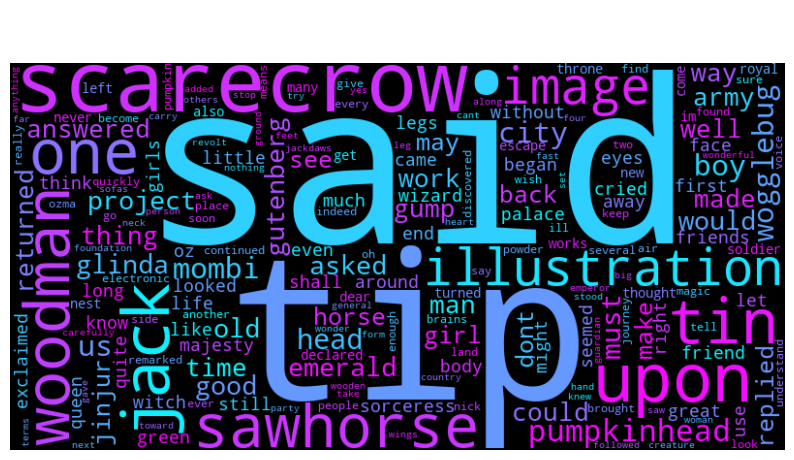

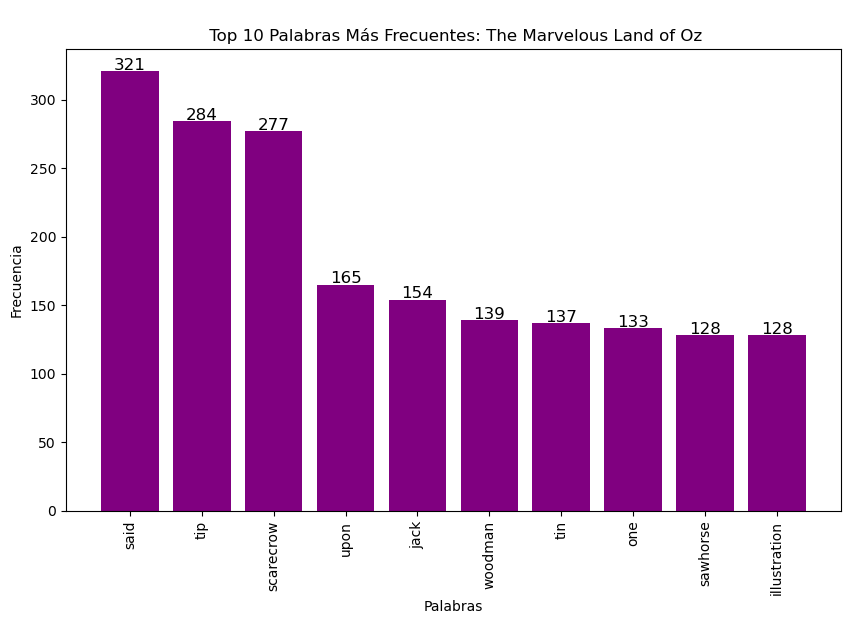

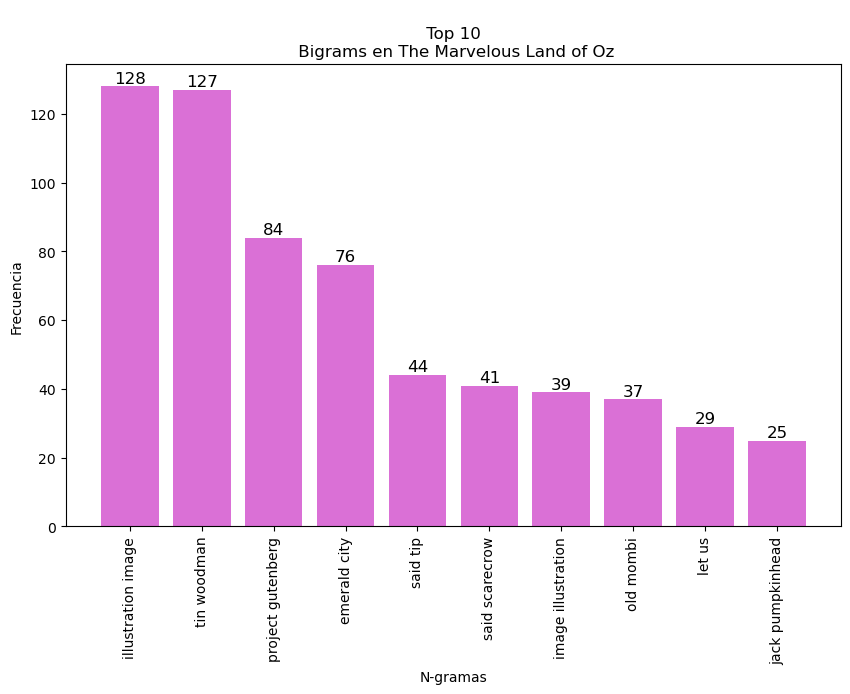

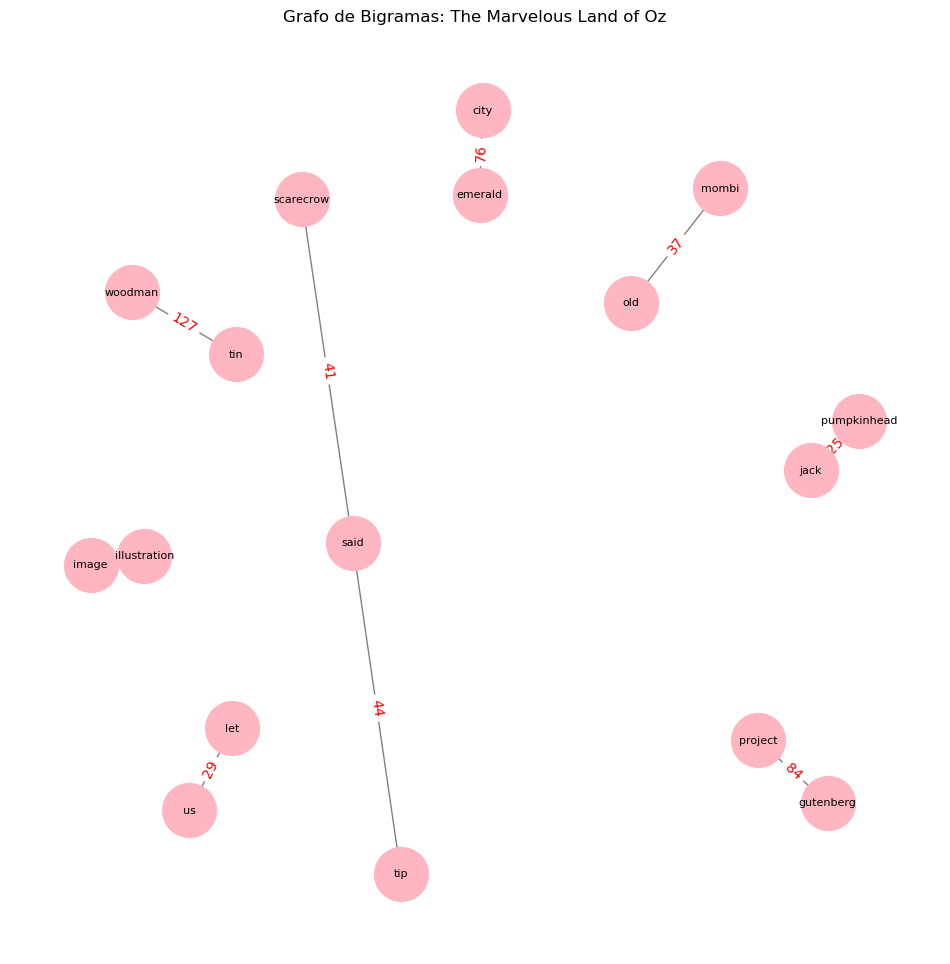

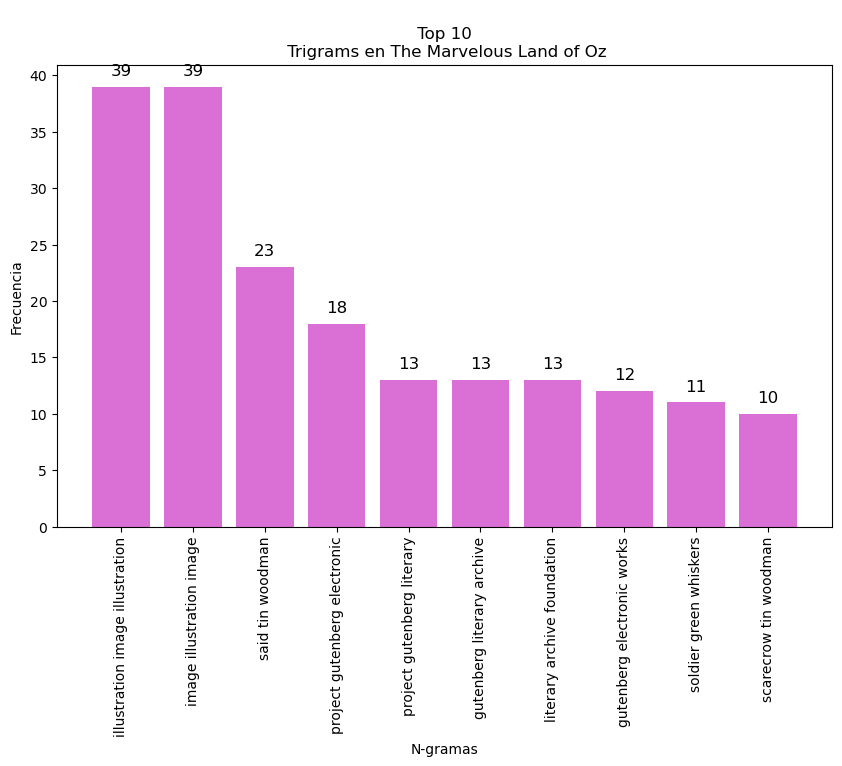


Estadísticas: {'total_words': 22499, 'unique_words': 4738, 'avg_word_length': 5.973376594515312, 'total_sentences': 1, 'punctuation_count': 0} 




=== Procesando: Dorothy and the Wizard in Oz ===


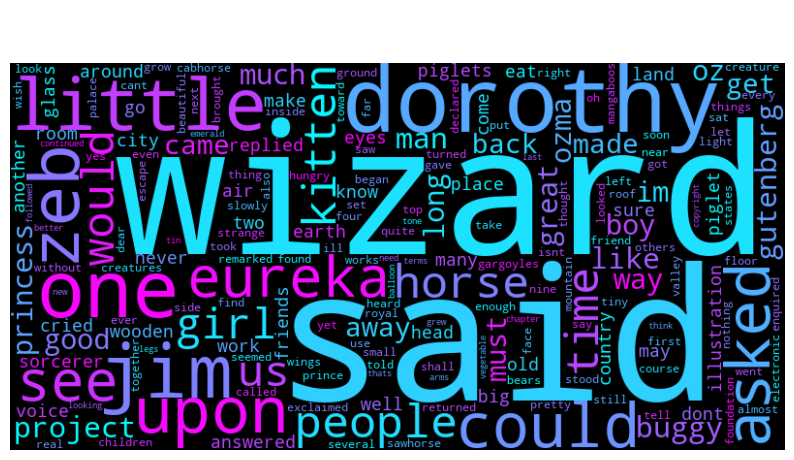

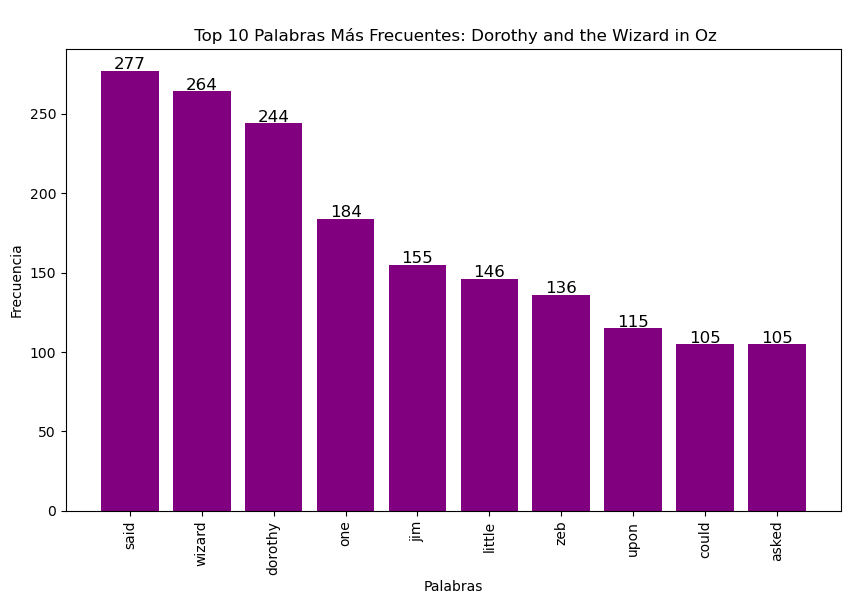

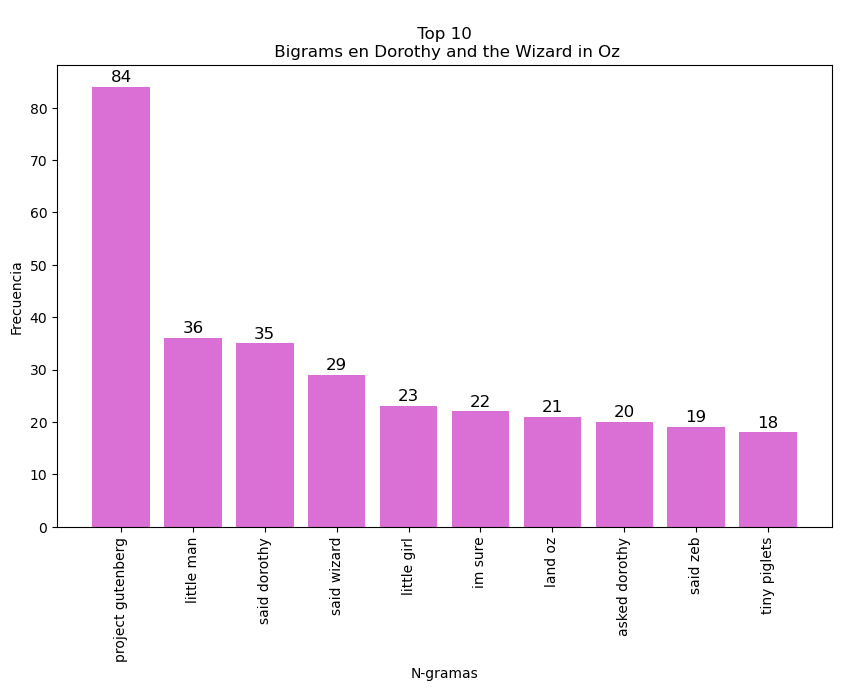

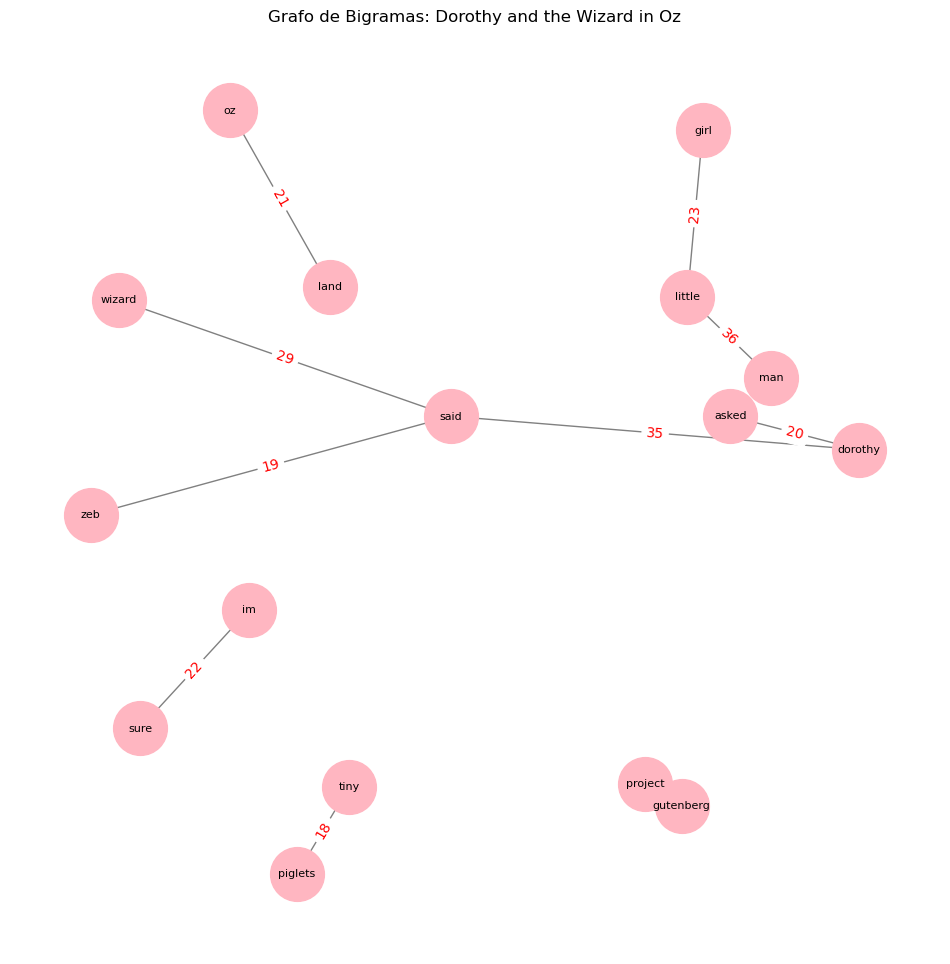

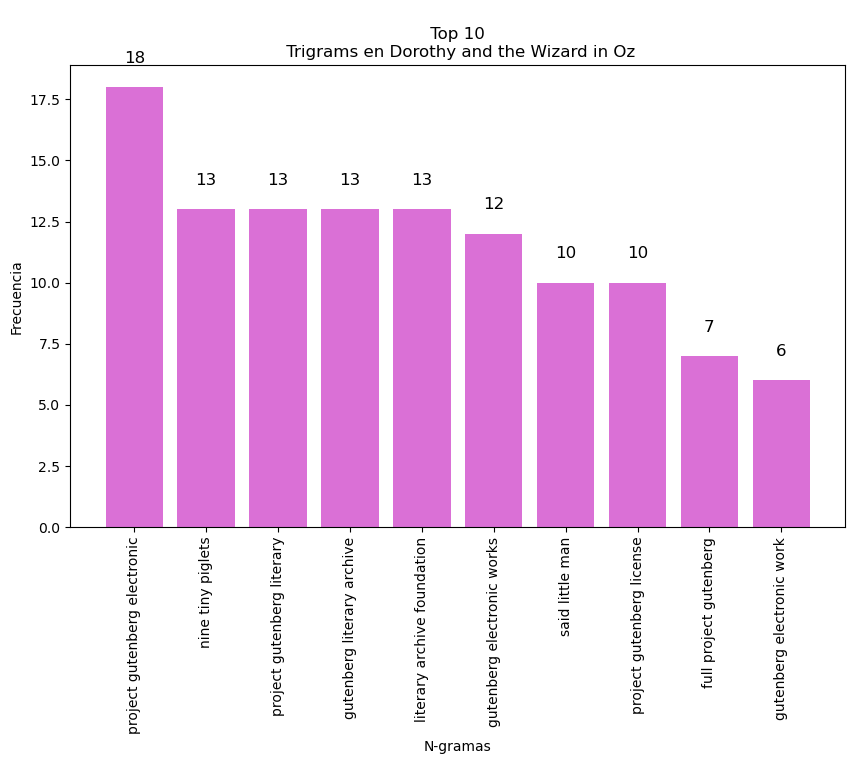


Estadísticas: {'total_words': 22031, 'unique_words': 4524, 'avg_word_length': 5.709908764922155, 'total_sentences': 1, 'punctuation_count': 0} 




=== Procesando: The Magic of Oz ===


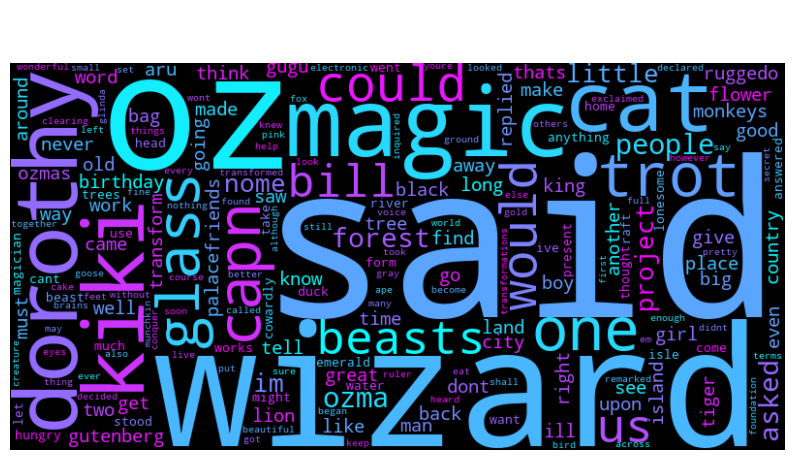

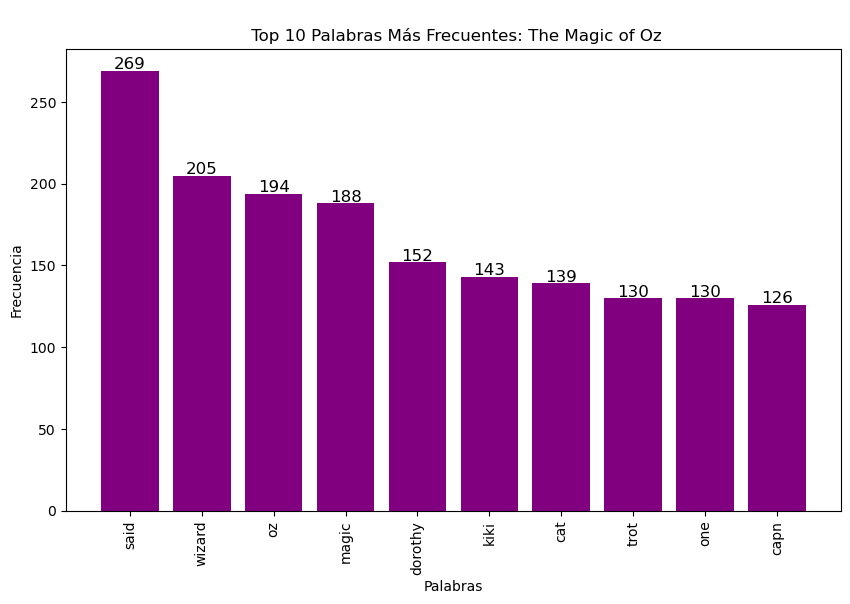

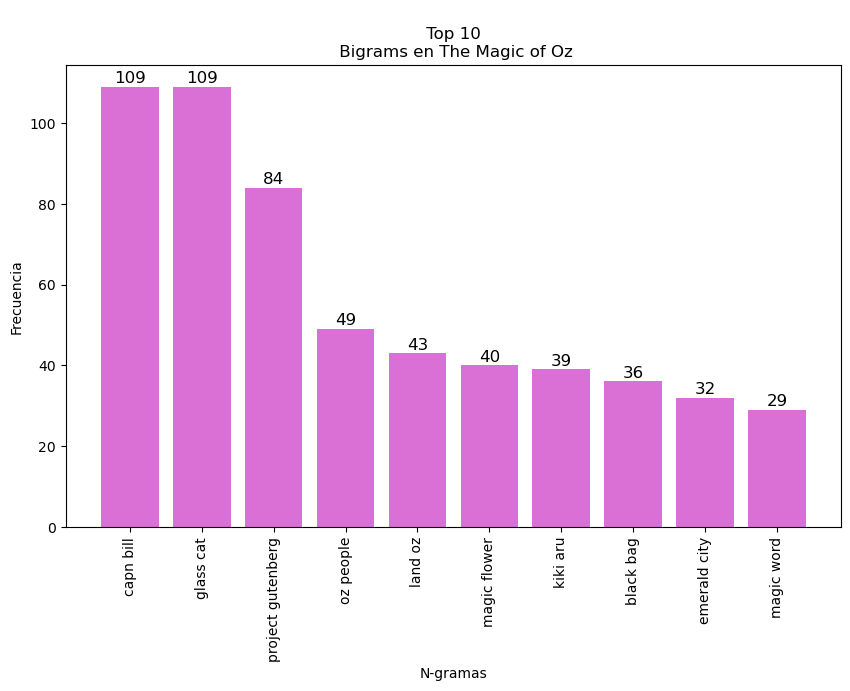

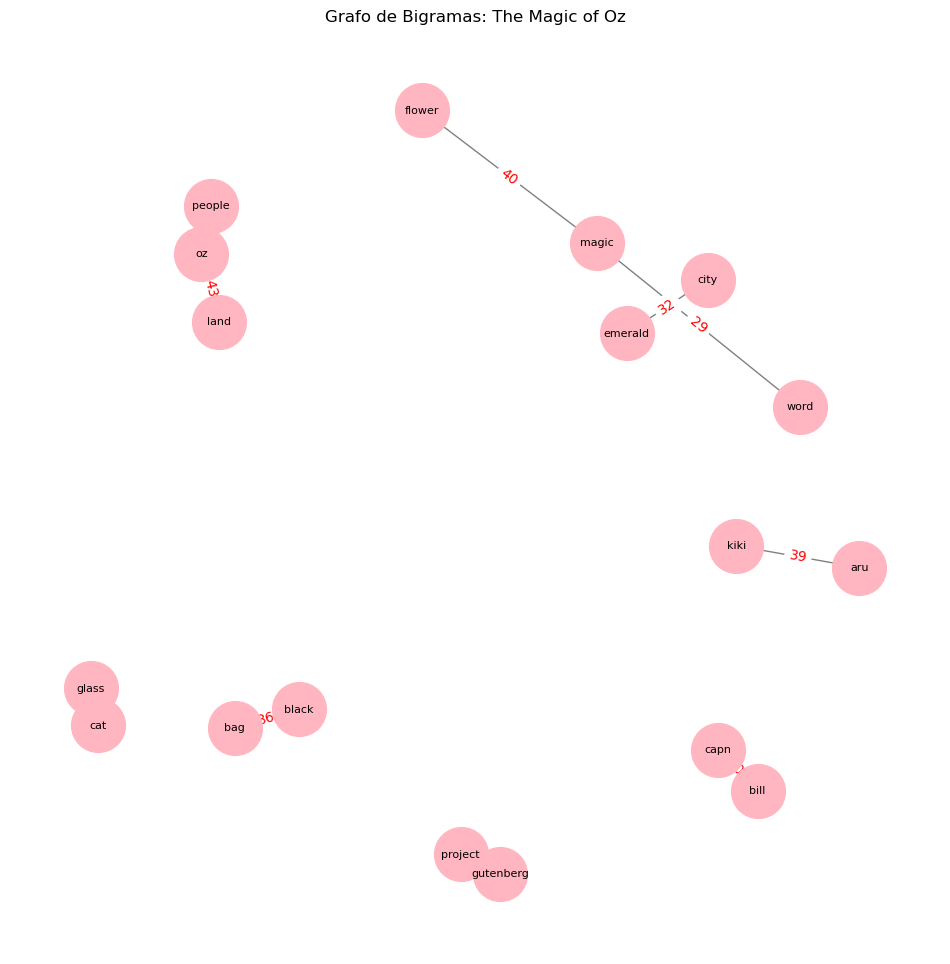

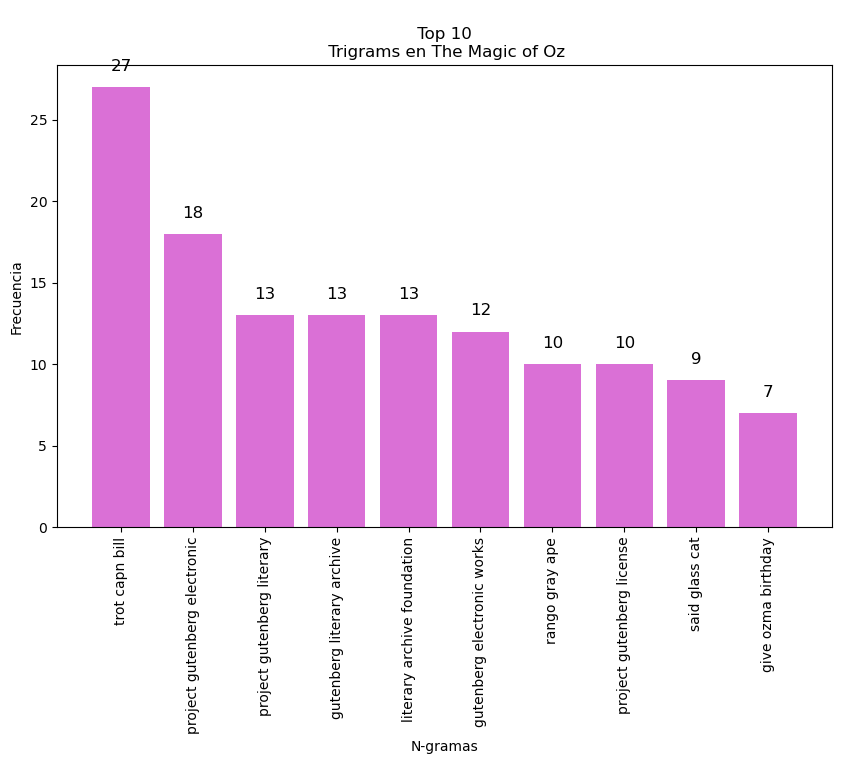


Estadísticas: {'total_words': 21003, 'unique_words': 3925, 'avg_word_length': 5.569347236109127, 'total_sentences': 1, 'punctuation_count': 0} 






In [44]:

results = process_books(file_paths)


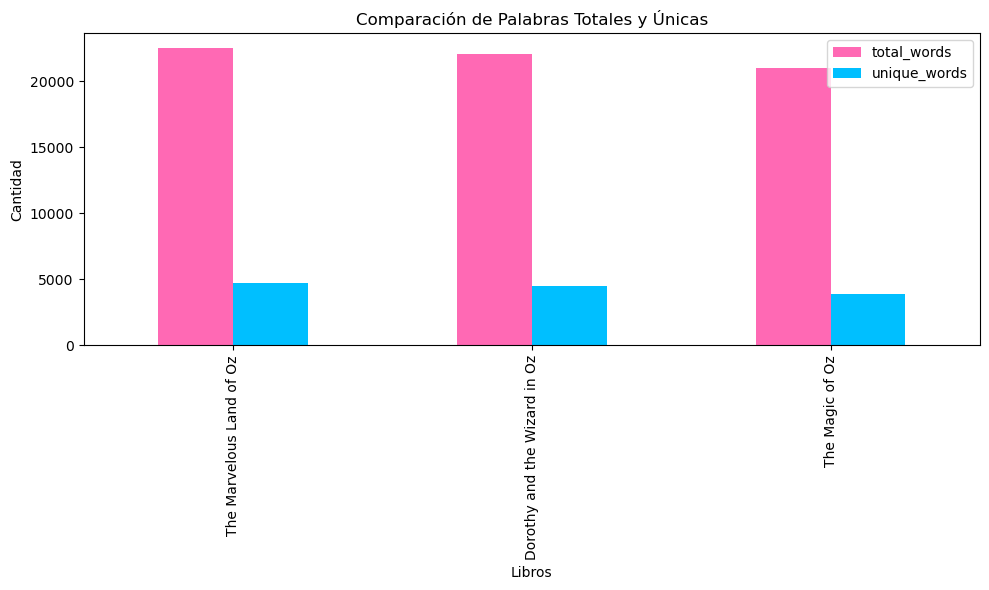

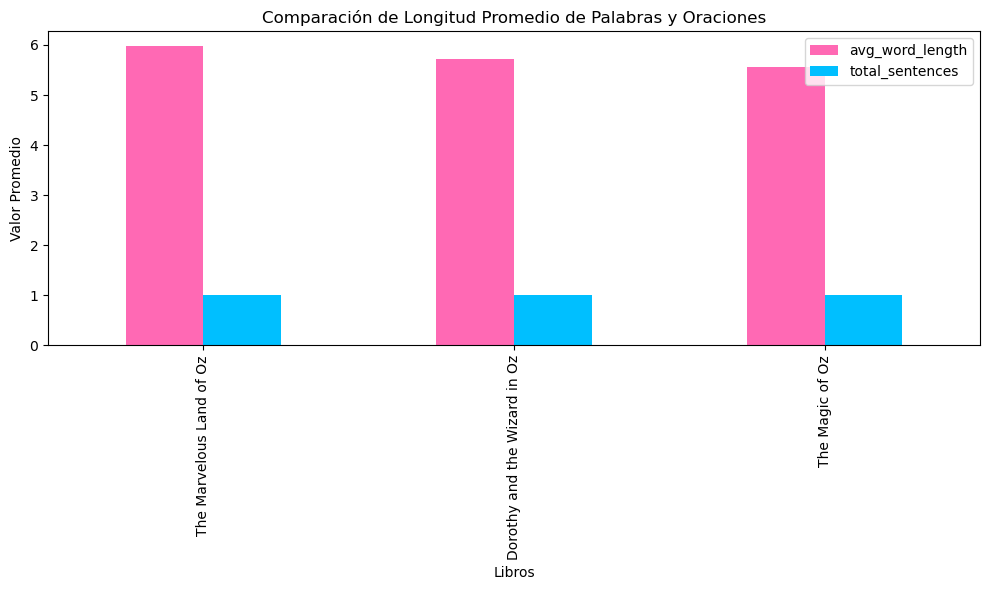


 === Comparación de Palabras Únicas === 

The Marvelous Land of Oz: ['promises', 'counsellor', 'bathed', 'village', 'june', 'trouserlegs', 'blocks', 'enjoying', 'abided', 'kingto'] (primeras 10 palabras únicas) 

Dorothy and the Wizard in Oz: ['bathed', 'machineman', 'overlook', 'bowsprits', 'folk', 'reflection', 'bearers', 'rockpockets', 'sought', 'awake'] (primeras 10 palabras únicas) 

The Magic of Oz: ['smallabout', 'counselors', 'meetings', 'pipt', 'kingto', 'whirl', 'barking', 'pole', 'bobbin', 'abashed'] (primeras 10 palabras únicas) 


 Palabras comunes entre los libros: ['invalidity', 'disappointment', 'surrounded', 'express', 'figure', 'gross', 'fish', 'distributed', 'lack', 'picture'] (primeras 10) 



In [45]:
compare_books(results)

In [46]:
# Obtener las 20 palabras más frecuentes de cada libro
top_20_book1 = set([word for word, _ in word_counts_1])
top_20_book2 = set([word for word, _ in word_counts_2])
top_20_book3 = set([word for word, _ in word_counts_3])

# Encontrar las palabras comunes en los tres libros
common_words_1_2 = top_20_book1 & top_20_book2 
common_words_2_3 = top_20_book2 & top_20_book3
common_words_1_3 = top_20_book1 & top_20_book3
common_words = top_20_book1 & top_20_book2 & top_20_book3

# Mostrar las palabras comunes
print("\n Palabras comunes en los libros 1 y 2:", common_words_1_2)
print("\n Palabras comunes en los libros 2 y 3:", common_words_2_3)
print("\n Palabras comunes en los libros 1 y 3:", common_words_1_3)
print("\n \n Palabras comunes en los 3 libros:", common_words)


 Palabras comunes en los libros 1 y 2: {'us', 'upon', 'said', 'one'}

 Palabras comunes en los libros 2 y 3: {'dorothy', 'us', 'said', 'one', 'people', 'asked', 'could', 'would', 'wizard'}

 Palabras comunes en los libros 1 y 3: {'us', 'said', 'one'}

 
 Palabras comunes en los 3 libros: {'us', 'said', 'one'}
